## Oppgave 6: Varmeligning,  (10 poeng)

Nå skal vi modellere steking av et legeme i en ovn. Vi ser på et tverrsnitt av legemet, slik at vi kun trenger de to koordinatretningene $x$ og $y$, og ikke dybderetningen $z$ for ovnen og legemet. 

Den partielle differensiallikningen er lik
$$
\begin{align}\tag{19}
u_t = \alpha\cdot(u_{xx} + u_{yy}),
\end{align}
$$
hvor $\alpha$ er legemets *termiske diffusivitet*. Passende tall for $\alpha$ kan slås opp på nett.

Vi antar at temperaturen av luft i ovnen holdes konstant på $200$ grader Celsius hele tiden, og bruker altså randbetingelsene at $u(x,y)=200$ på alle kantene av legemet.

Differensialligningen er kun definert for legemet, vi tar ikke med ovnen rundt i denne oppgaven.

Ved tiden $t=0$ (når legemet settes i ovnen) så er temperaturen lik $15$ grader i hele legemet.

### a)

Velg en gjenstand å ta utgangspunkt i, hvor gjendstanden skal ha et rektangulært tverrsnitt. Hvilket materiale har gjenstanden, og hva er den termiske diffusitiviteten $\alpha$?

Bestem deretter hvilke verdier for koordinatene $x$ og $y$ som beskriver gjenstanden.

### b)

Sett opp den partielle differensiallikningen med rand- og initialbetingelser. Løs deretter likningen numerisk.

Legg ved *varmeplot* (altså fargeplot med rødt for varmt og blått for kaldt) for noen ulike tidspunkt.

### c)

Hvor lang tid tar det før temperaturen i midten av legemet når 60 grader? Legg ved et varmeplot for tidspunktet dette skjer.

### d)

Lag en animasjon som viser hvordan temperaturen til legemet endrer seg over tid.

Dere trenger ikke å ta med animasjonen i rapporten, men inkluder kildekode og forklar hva dere observerer.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy.linalg as la


xsize = 10  # cm
ysize = 10  # cm
objectsize = 10  # cm

alpha = 12.90  #termisk diffusivitet VIKTIG AT DETTE ER I CM^2/S
dx = xsize / 101 
dy = ysize / 101
dt = 0.0001  #tid/steg
steps = 1000 #antall steg
tid = dt*steps #total tid


x = np.linspace(0, xsize, 102)
y = np.linspace(0, ysize, 102)

U0 = np.ones((m, n)) * 15
U0[:, 0] = U0[:, -1] = 200
U0[0, :] = U0[-1, :] = 200

#deriverer for uxx og uyy, og bruker varmeligninga? ok 
def f(u, t):
    u_xx = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / dx**2
    u_yy = (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / dy**2
    return alpha * (u_xx + u_yy)

def euler(U, dt, steps):
    u = np.copy(U)
    for t in range(steps):
        u += dt * f(u, t)
        u[:, 0] = u[:, -1] = 200
        u[0, :] = u[-1, :] = 200
    return u

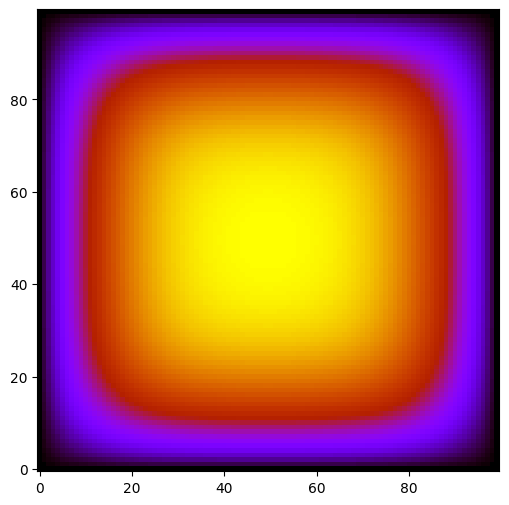

In [38]:
ims = []
fig = plt.figure(figsize=(6, 6))

for i in range(0, steps, 10): 
    u_step = euler(U0, dt, i)
    ax = fig.gca()
    im = ax.imshow(u_step, cmap='gnuplot_r', animated=True, origin='lower')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())

In [42]:
i = 0

u_step = euler(U0, dt, i)

midtverdier = []

while u_step[50,50] < 100.0:
    u_step = euler(U0, dt, i)
    midtverdier.append(u_step[50,50])
    i += 100

print(midtverdier)

[np.float64(15.0), np.float64(15.0), np.float64(15.000000010557027), np.float64(15.00002233927417), np.float64(15.001132642358309), np.float64(15.012415623022896), np.float64(15.062525094696301), np.float64(15.2008849023206), np.float64(15.486099973185343), np.float64(15.97220494314778), np.float64(16.699908487636844), np.float64(17.693613193924456), np.float64(18.962311256989977), np.float64(20.502339468382072), np.float64(22.300638193644925), np.float64(24.33779575534149), np.float64(26.5905820237205), np.float64(29.03390856245731), np.float64(31.642263071671927), np.float64(34.390706810852386), np.float64(37.25552958588084), np.float64(40.214647341613606), np.float64(43.247812663063236), np.float64(46.33669345978909), np.float64(49.46486183929118), np.float64(52.61772428322391), np.float64(55.78241568116823), np.float64(58.94767324373702), np.float64(62.10370143469394), np.float64(65.24203547388908), np.float64(68.35540836393535), np.float64(71.43762453678102), np.float64(74.4834419

In [39]:
#finne ut etter hvor mange tidssteg den er 60 grader? 
i = 0

u_step = euler(U0, dt, i)

while u_step[50,50] < 60.0:
    u_step = euler(U0, dt, i)
    i += 50

i = i-100

u_step = euler(U0, dt, i)

while u_step[50,50] < 60.0:
    u_step = euler(U0, dt, i)
    i += 1

i = i - 1

u_step = euler(U0, dt, i)

print(f"Midten av legemet treffer 60 grader etter {i} tidssteg, {i*dt:.3f} sekunder, og da er temperaturen {u_step[50,50]:.3f} grader.")

Midten av legemet treffer 60 grader etter 2734 tidssteg, 0.273 sekunder, og da er temperaturen 60.022 grader.
